In [1]:
import numpy as np, scipy as sp, matplotlib.pyplot as plt


# criar vetor tempo
N = 150 # numero de amostras
T = 0.5 # periodo de amostragem
t0 = 0
t = np.linspace(t0, (N-1)*T, N) # vetor tempo
# t = np.arange(t0, N*T, T)

x = np.sin(0.44*np.pi*t) + 0.5*np.sin(np.pi*t) # sinal


# # grafico do sinal
# plt.figure(figsize=(8,2))
# plt.plot(x);
# plt.title("Sinal $x[n]$")
# plt.xlabel("amostras [$n$]")
# plt.ylabel("$x[n]$")

# plt.figure(figsize=(8,2))
# plt.plot(t, x);
# plt.title("Sinal $x(nT)$")
# plt.xlabel("segundos [$nT$]")
# plt.ylabel("$x[nT]$");
# # plt.xlim(0, 12);

# Transformada de Fourier

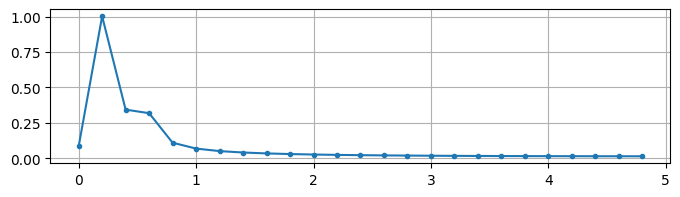

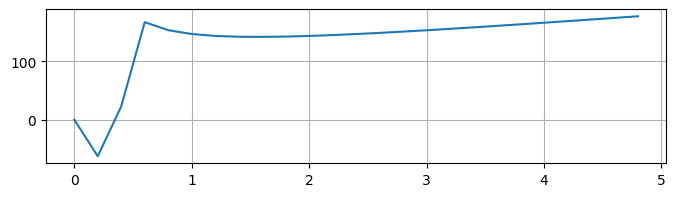

In [11]:
from scipy.fft import fft


# criar vetor tempo
N = 50 # numero de amostras
T = 0.1 # periodo de amostragem
t0 = 0
t = np.linspace(t0, (N-1)*T, N) # vetor tempo
x = np.sin(0.44*np.pi*t) + 0.5*np.sin(np.pi*t) # sinal

def serieDeFourier(x, N, T):
  Xf = fft(x)
  Xf = Xf/N # corrige a amplitude do sinal
  Xf = Xf[:N//2] # dividindo o Xf pela metade
  Xf[1:] = 2*Xf[1:] # ajuste da amplitude

  w0 = 2*np.pi/N # rad/amostra
  w0 = 2*np.pi/(N*T) # rad/s
  w0 = 1/(N*T) # Hz

  freq = np.arange(N//2)*w0
  mag = np.abs(Xf) # modulo
  magdB = 20*np.log10(mag)
  pha = np.angle(Xf, deg=True) #fase

  return freq, mag, pha

freq, mag, pha = serieDeFourier(x, N, T)

plt.figure(figsize=(8,2))
plt.grid(which='both')
# plt.semilogx(freq, magdB, '.-');
plt.plot(freq, mag, '.-');

plt.figure(figsize=(8,2))
plt.grid(which='both')
plt.plot(freq, pha);
# plt.semilogx(freq, pha);

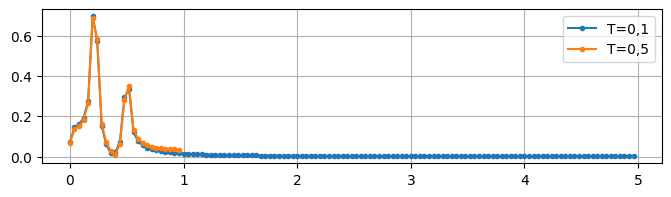

In [20]:
from scipy.fft import fft


# criar vetor tempo
# N = 50 # numero de amostras
T = 0.5 # periodo de amostragem
tf = 25
t0 = 0
# t = np.linspace(t0, (N-1)*T, N) # vetor tempo
t1 = np.arange(t0, tf, T) # vetor tempo
x1 = np.sin(0.44*np.pi*t1) + 0.5*np.sin(np.pi*t1) # sinal
N = len(x1)
freq1, mag1, pha1 = serieDeFourier(x1, N, T)


# criar vetor tempo
T = 0.1 # periodo de amostragem
t0 = 0
tf = 25
t2 = np.arange(t0, tf, T) # vetor tempo
x2 = np.sin(0.44*np.pi*t2) + 0.5*np.sin(np.pi*t2) # sinal
N = len(x2)
freq2, mag2, pha2 = serieDeFourier(x2, N, T)


plt.figure(figsize=(8,2))
plt.grid(which='both')
# plt.semilogx(freq, magdB, '.-');
plt.plot(freq2, mag2, '.-', label='T=0,1');
plt.plot(freq1, mag1, '.-', label='T=0,5');
plt.legend()

# plt.figure(figsize=(8,2))
# plt.grid(which='both')
# plt.plot(freq, pha);
# # plt.semilogx(freq, pha);

In [15]:
# x1.shape, x2.shape

((50,), (250,))

# Zero-padding

In [21]:
from scipy.fft import fft

def serieDeFourier(x, Nfft, T):
  Xf = fft(x, Nfft)
  N = len(x)
  Xf = Xf/N # corrige a amplitude do sinal
  Xf = Xf[:Nfft//2] # dividindo o Xf pela metade
  Xf[1:] = 2*Xf[1:] # ajuste da amplitude

  w0 = 2*np.pi/Nfft # rad/amostra
  w0 = 2*np.pi/(Nfft*T) # rad/s
  w0 = 1/(Nfft*T) # Hz

  freq = np.arange(Nfft//2)*w0
  mag = np.abs(Xf) # modulo
  magdB = 20*np.log10(mag)
  pha = np.angle(Xf, deg=True) #fase

  return freq, mag, pha


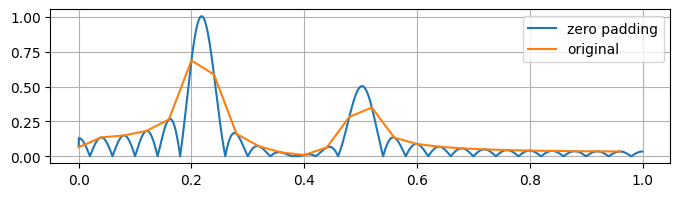

In [24]:
from scipy.fft import fft


# criar vetor tempo
# N = 50 # numero de amostras
T = 0.5 # periodo de amostragem
tf = 25
t0 = 0
# t = np.linspace(t0, (N-1)*T, N) # vetor tempo
t1 = np.arange(t0, tf, T) # vetor tempo
x1 = np.sin(0.44*np.pi*t1) + 0.5*np.sin(np.pi*t1) # sinal
N = len(x1)
freq1, mag1, pha1 = serieDeFourier(x1, N, T)


# criar vetor tempo
T = 0.5 # periodo de amostragem
t0 = 0
tf = 25
t2 = np.arange(t0, tf, T) # vetor tempo
x2 = np.sin(0.44*np.pi*t2) + 0.5*np.sin(np.pi*t2) # sinal
N = len(x2)
freq2, mag2, pha2 = serieDeFourier(x2, N*100, T)


plt.figure(figsize=(8,2))
plt.grid(which='both')
# plt.semilogx(freq, magdB, '.-');
plt.plot(freq2, mag2, '-', label='zero padding');
plt.plot(freq1, mag1, '-', label='original');
plt.legend()

# plt.figure(figsize=(8,2))
# plt.grid(which='both')
# plt.plot(freq, pha);
# # plt.semilogx(freq, pha);

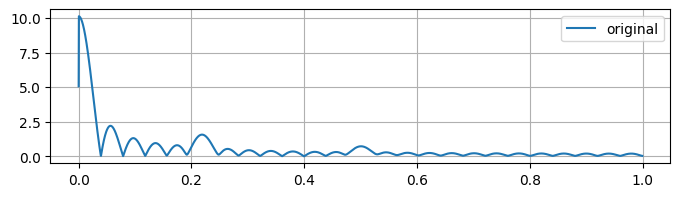

In [61]:
from scipy.fft import fft


# criar vetor tempo
x2 = np.sin(0.44*np.pi*t2) + 0.5*np.sin(np.pi*t2) # sinal
x1 = x2 + np.random.normal(5, 0, len(x2))
N = len(x1)
freq1, mag1, pha1 = serieDeFourier(x1, 100*N, T)


plt.figure(figsize=(8,2))
plt.grid(which='both')
plt.plot(freq1, mag1, '-', label='original');
plt.legend()

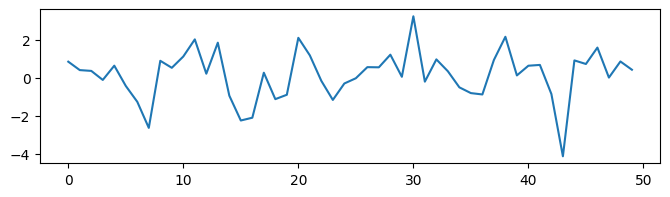

In [59]:

plt.figure(figsize=(8,2))
plt.plot(x1)